# Coding for Humanities final exam 2020

Rules:

- You should work alone. Do NOT discuss the exam with anyone until after the deadline. Identical answers will be reported to the board of examiners.
- You may look up any information you want (including re-using code from the labs or lectures, or using code you find online as inspiration), but don't copy-paste code without understanding it.
- You should only use Python concepts that have been covered in the course slides and notebooks. (Note: The book contains some concepts that have NOT been covered; don't use those; this also goes for code you find online).
- Partial credit will be assigned. Try to get as far as you can even if you cannot completely solve a problem. If you did not manage to solve a previous subquestion, write the code as if you did manage to solve that subquestion. If you are asked to summarize results but your code doesn't work, explain what results you expect to get and why.
- Your solutions are graded for:
  - whether your code works correctly in all cases,
  - whether your summary of the results is complete and correct,
  - code style (meaningful variable names, succinct & elegant code)

## 1. Imitation is the sincerest form of flattery (5pts)

When Melania Trump gave a speech at the Republican National Convention in 2016, [commentators noted several striking similarities](https://www.npr.org/2016/07/19/486560186/section-of-melania-trumps-monday-speech-closely-imitates-michelle-obama-in-2008) with the speech of Michelle Obama at the 2008 Democratic National Convention. In this question, we will inspect and measure the similarity between the two speeches. For comparison, we will also look at the speech of Laura Bush at the Republican National Convention in 2004, to contrast the results of suspected plagiarism (Melania) with original works (Michelle, Laura). The following files are provided in the directory `finaldata/`:

- `laura.txt`: [2004 RNC speech](https://www.foxnews.com/transcript/first-lady-laura-bush-in-the-rnc-spotlight) by Laura Bush
- `michelle.txt`: [2008 DNC speech](https://www.npr.org/templates/story/story.php?storyId=93963863) by Michelle Obama
- `melania.txt`: [2016 RNC speech](https://time.com/4412008/republican-convention-melania-trump-2/) by Melania Trump

a. Create a function `readtexts(pattern)` that reads text files specified by a `glob` pattern and returns the preprocessed texts in a dictionary. Each key in the dictionary should be a filename without directories, and the value should be a list of lowercased tokens in that file.

In [1]:
import os
import glob
import nltk
import pandas as pd

# Your code here
def readtexts(pattern):
    result = {}
    for fname in glob.glob(pattern):
        with open(fname, encoding='utf8') as inp:
            txt = inp.read().lower()
        result[os.path.basename(fname)] = nltk.word_tokenize(txt)
    return result

# Checking the first 10 tokens of each text (should print True):
speech = readtexts('finaldata/*.txt')
print(speech['melania.txt'][:10] == ['thank', 'you', '.', 'thank', 'you', 'very', 'much', '.', 'you', 'have'])
print(speech['laura.txt'][:10] == ['thanks', ',', 'everybody', '.', 'thank', 'you', 'all', 'so', 'much', '.'])
print(speech['michelle.txt'][:10] == ['as', 'you', 'might', 'imagine', ',', 'for', 'barack', ',', 'running', 'for'])

True
True
True


A naive way of measuring text similarity is looking at overlapping vocabulary. If two speeches both contain a rare word such as "[supercalifragilisticexpialidocious](https://en.wikipedia.org/wiki/Supercalifragilisticexpialidocious)", that looks very suspicious. However, most words in texts are frequent. It is more effective to look at specific combinations of words. If a speech contains the words ``Ask not what your country can do for you``, it is almost certainly referencing or borrowing from John F. Kennedy's inaugural address, even though each of the individual words is very common. On the other hand, ``Good evening ladies and gentlemen`` is such a common expression that it has to be considered a false alarm and not evidence of plagiarism. Therefore automatic tools may be helpful in identifying similarities, but the results always need to be interpreted manually.

We will extract sequences of tokens (i.e., phrases) from the texts. Sequences of consecutive tokens are called n-grams, where n is a number indicating the number of tokens. NLTK has a function to generate all n-grams in a list of tokens. For example:

```python
tokens = 'the cat is on the mat'.split()
print(list(nltk.ngrams(tokens, 1)))
print(list(nltk.ngrams(tokens, 2)))
print(list(nltk.ngrams(tokens, 3)))
```
Gives:
```
[('the',), ('cat',), ('is',), ('on',), ('the',), ('mat',)]
[('the', 'cat'), ('cat', 'is'), ('is', 'on'), ('on', 'the'), ('the', 'mat')]
[('the', 'cat', 'is'), ('cat', 'is', 'on'), ('is', 'on', 'the'), ('on', 'the', 'mat')]
```

As you can see above, the `nltk.ngrams` function returns n-grams as tuples of strings, e.g., `('the', 'cat')`. It's easier to read the n-grams if they are represented as strings, e.g., `'the cat'`, so we will convert the n-grams to this format.

b. Create a function `get_ngrams(tokens, n)`, which takes a list of tokens, and returns a list of n-grams, formatted as strings.

In [2]:
# Your code here
def get_ngrams(tokens, n):
    return [' '.join(ngram) for ngram in nltk.ngrams(tokens, n)]

# Test (should print True)
print(get_ngrams(['the', 'cat', 'is', 'on', 'the', 'mat'], 2)
     == ['the cat', 'cat is', 'is on', 'on the', 'the mat'])

True


Now that we can extract n-grams from texts, we can identify n-grams that occur in two texts, which may be evidence of re-use. Using `set()`, we can reduce a list of n-grams to unique n-grams. This has the additional advantage that we can use the `&` operator ('intersection') to find the overlapping items efficiently:

```python
a = ['a', 'b', 'c']
b = ['b', 'c', 'd']
print(set(a) & set(b))
```
Gives: ``{'b', 'c'}``

c. Create a function `common_ngrams(tokens1, tokens2, n)` that given two lists of tokens and a number `n`, computes the n-grams for the lists of tokens, and returns the set of n-grams they have in common. Use the function `get_ngrams` you created in 1b.

In [3]:
# Your code here
def common_ngrams(tokens1, tokens2, n):
    return set(get_ngrams(tokens1, n)) & set(get_ngrams(tokens2, n))

# Test (should print True)
sent1 = ['the', 'cat', 'sat', 'on', 'the', 'mat']
sent2 = ['the', 'cat', 'is', 'purring']
print(common_ngrams(sent1, sent2, 2) == {'the cat'})

True


d. Apply the function from 1c to the speeches of Laura Bush, Michelle Obama, and Melania Trump, which you read into a dictionary in question 1a. Use the value 6 for `n`; i.e., we want to see all phrases of 6 tokens the speeches have in common. Print the results of comparing the speeches of Laura vs Meliana, Laura vs Michelle, and finally Michelle vs Melania. For each pair of speeches, summarize in a single sentence whether you find evidence of borrowed phrases.

In [4]:
# Your code here
print('laura - melania:')
print(common_ngrams(speech['laura.txt'], speech['melania.txt'], 6))
print()
print('laura - michelle:')
print(common_ngrams(speech['laura.txt'], speech['michelle.txt'], 6))
print()
print('michelle - melania:')
print(common_ngrams(speech['michelle.txt'], speech['melania.txt'], 6))

# Your summary here
# Laura and Melania have no overlap.
# The overlap between Michelle and Laura only concerns common phrases.
# Melania has borrowed quite some phrases from Michelle.

laura - melania:
set()

laura - michelle:
{'god bless you , and god', 'you , and god bless america', 'bless you , and god bless', ', and god bless america .'}

michelle - melania:
{'you work hard for what you', 'your bond and you do what', 'bond and you do what you', 'that you work hard for what', 'hard for what you want in', 'and your willingness to work for', 'your word is your bond and', 'is your bond and you do', 'dreams and your willingness to work', 'willingness to work for them .', 'know that the only limit to', 'your willingness to work for them', 'for what you want in life', 'to know that the only limit', 'word is your bond and you', 'work hard for what you want', 'that your word is your bond', 'your dreams and your willingness to', 'of your dreams and your willingness', 'and you do what you say'}


In questions 1d we have looked at 6-grams (n-grams of length 6). Now we want to look at shorter and longer sequences.

e. Compute all the common n-grams from n=1 to n=10 for all pairs of texts. Make a Pandas DataFrame with the following columns: `['melania & michelle', 'melania & laura', 'michelle & laura']`. The row labels should be the `n` values (1 to 10). The content of DataFrame should be the number of common n-grams for a given `n` and a pair of texts.

For instance, for the column `'melania & michelle'`, row n=5, the value should be the result of `len(common_ngrams(speech['michelle.txt'], speech['melania.txt'], 5))`

Create the DataFrame using a dictionary as shown in the slides of week 7. Summarize in a single sentence whether the result of 1d is confirmed for longer and shorter phrases.

In [5]:
# Your code here
df = pd.DataFrame({
    'melania & michelle': [len(common_ngrams(speech['melania.txt'], speech['michelle.txt'], n)) for n in range(1, 11)],
    'melania & laura': [len(common_ngrams(speech['melania.txt'], speech['laura.txt'], n))  for n in range(1, 11)],
    'michelle & laura': [len(common_ngrams(speech['michelle.txt'], speech['laura.txt'], n))  for n in range(1, 11)]},
    index=range(1, 11))
df

# Your summary here
# Yes, the results are confirmed

,melania & michelle,melania & laura,michelle & laura
1,226,226,280
2,227,195,272
3,86,44,71
4,45,9,22
5,29,3,9
6,20,0,4
7,16,0,3
8,12,0,2
9,9,0,1
10,6,0,0


## 2. Swearing in literature (4pts)

In this question we will work with a dataset of English-language literature. The dataset consists of a table with books as rows. The columns contain metadata and results from a tool called [LIWC](https://liwc.wpengine.com/), which stands for Linguistic Inquiry and Word Counts. LIWC counts words in specific categories, and returns the result as a percentage. For example, if a book has a score of `1.23` for `'PositiveEmotion'`, that means that 1.23% of the words in that book consists of positive emotion words.

Dataset credit: https://data.mendeley.com/datasets/tmp32v54ss/1

a. Read the dataset ``finaldata/english_metadata_and_liwc.csv`` into a Pandas DataFrame. In the column `'Sex'`, the value `1` means `male`, while `2` means `female`; replace the numbers such that values in the `'Sex'` column are the strings `male` and `female` instead of `1` and `2`, respectively. Finally, rename the `'Sex'` column to `'Gender'`.

In [6]:
import pandas as pd
import seaborn as sns

# Your code here
en = pd.read_csv('finaldata/english_metadata_and_liwc.csv', encoding='utf8')
en = en.replace({'Sex': {1: 'male', 2: 'female'}})
en = en.rename(columns={'Sex': 'Gender'})

b. Make a box plot with `'Age'` on the x-axis, and `'Gender'` on the y-axis. Summarize the difference in one sentence.

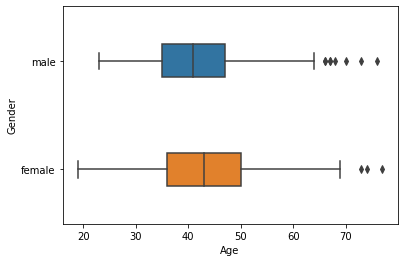

In [7]:
# Your code here
sns.boxplot(x='Age', y='Gender', data=en, width=0.3);
# Your summary here
# The range of ages for female writer is larger
# (both younger and older writers),
# and the median is larger.

c. The column `'swear'` contains the percentage of swear words in each text. Visualize using a scatter plot whether swearing in literature became more or less common over time (use the `'Publication Year'` column. Summarize the result in one sentence.

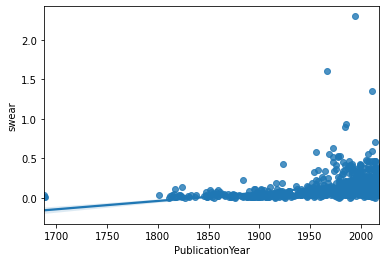

In [8]:
# Your code here
sns.regplot(x='PublicationYear', y='swear', data=en);
# Your summary here
# Summary: yes, swearing is more common in more recent books.

d. Visualize using a scatter plot whether swearing in literature is more common in younger or older authors (use the `'Age'` column). Summarize the results in one sentence.

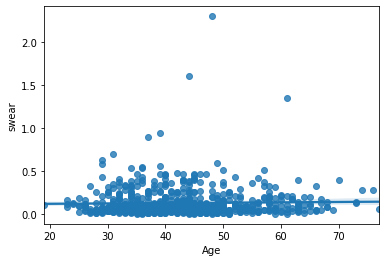

In [9]:
# Your code here
sns.regplot(x='Age', y='swear', data=en);
# Your summary here
# No, writers do not seem to swear more or less
# when they are older or younger.